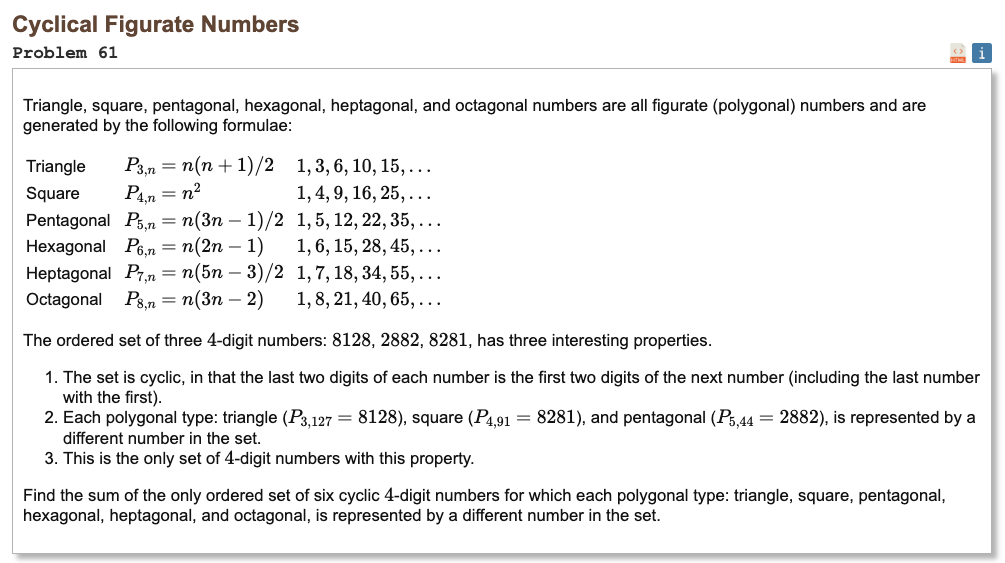

## Initial approach

Returns the n-th value of each polygonal number type from triangle to octagonal.

In [1]:
def triangle(n):
    return n * (n + 1) // 2

def square(n):
    return n * n

def pentagonal(n):
    return n * (3 * n - 1) // 2

def hexagonal(n):
    return n * (2 * n - 1)

def heptagonal(n):
    return n * (5 * n - 3) // 2

def octagonal(n):
    return n * (3 * n - 2)

Generate_polygonals(fn): Generates all 4-digit numbers from a given polygonal function.

In [2]:
def generate_polygonals(fn):
    numbers = []
    n = 1
    while True:
        value = fn(n)
        if value >= 10000:
            break
        if value >= 1000:
            numbers.append(value)
        n += 1
    return numbers

* polygonal_funcs: A list of functions for generating different polygonal numbers.
* polygonal_sets: A list of 4-digit numbers generated from each polygonal function.

In [3]:
polygonal_funcs = [
    triangle,
    square,
    pentagonal,
    hexagonal,
    heptagonal,
    octagonal
]

polygonal_sets = [generate_polygonals(fn) for fn in polygonal_funcs]

Builds and searches for a cyclical chain of six 4-digit polygonal numbers with matching digit pairs.

In [4]:
from itertools import permutations

def build_chain(chain, remaining_sets):
    if not remaining_sets:
        if str(chain[-1])[-2:] == str(chain[0])[:2]:
            return chain
        return None
    last_suffix = str(chain[-1])[-2:]
    for idx, numbers in enumerate(remaining_sets):
        for num in numbers:
            if str(num)[:2] == last_suffix:
                result = build_chain(chain + [num], remaining_sets[:idx] + remaining_sets[idx+1:])
                if result:
                    return result
    return None

for order in permutations(range(6)):
    ordered_sets = [polygonal_sets[i] for i in order]
    for num in ordered_sets[0]:
        result = build_chain([num], ordered_sets[1:])
        if result:
            print(result)
            print("Result:",sum(result))
            break
    else:
        continue
    break

[8256, 5625, 2512, 1281, 8128, 2882]
Result: 28684
